In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

% matplotlib inline

EYE_AR_THRESHOLD = '0.23'
ANGLE_THRESHOLD = 20
total_time = 4*60 + 24

file_name = 'drosiness_dark_shift_light'
in_path = '/Users/fenghuiyou/Desktop/Prj/tunning/out/logs/'
file_path = in_path + 'dt_experiment_' + file_name + '.csv'

out_path = '/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/'

#log_df = pd.read_csv('/Users/fenghuiyou/Desktop/Prj/tunning/out/logs/dt_experiment_drosiness_dark_shift_light.csv')
log_df = pd.read_csv(file_path)
log_df.head(10)

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
0,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
1,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
2,1,0.33448588193827844,-53.11394879341673,65.58516242829776,84.4539711218493,18.60846125163536,0,0,NaN,0.0020110607147216797,0.017233848571777344
3,2,0.3277673338146963,-53.31739111239548,65.57328045137852,84.18126982301597,18.34299489963224,0,0,NaN,0.0020079612731933594,0.018586158752441406
4,3,0.31410192511979956,-52.55827278721198,65.66374559999556,85.39643356257756,19.428268028219122,0,0,NaN,0.0023310184478759766,0.015398025512695312
5,4,0.3097009943593406,-53.12312325328732,67.3342382632249,84.5273583729647,18.4423233658144,0,0,NaN,0.0022351741790771484,0.017776966094970703
6,5,0.31977044538247923,-52.607012222633045,67.30392636759898,85.59662996707742,19.336744492185403,0,0,NaN,0.0020558834075927734,0.01644110679626465
7,6,0.32351216851913656,-52.862743728631315,68.25398041679217,85.10619815483999,18.863600105363524,0,0,NaN,0.0022640228271484375,0.013048887252807617
8,7,0.3238226803267886,-52.368090605912926,67.38911233445913,86.24866000046028,19.828978958261054,0,0,NaN,0.0018029212951660156,0.017192840576171875
9,8,0.33642119049638886,-51.12922561575191,67.36667534365974,86.48443197263796,20.73226256495198,0,0,0.5,0.001992940902709961,0.015405893325805664


# 1 Data preprocessing

In [2]:
log_df.shape
log_df.head(5)

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
0,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
1,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
2,1,0.33448588193827844,-53.11394879341673,65.58516242829776,84.4539711218493,18.60846125163536,0,0,NaN,0.0020110607147216797,0.017233848571777344
3,2,0.3277673338146963,-53.31739111239548,65.57328045137852,84.18126982301597,18.34299489963224,0,0,NaN,0.0020079612731933594,0.018586158752441406
4,3,0.31410192511979956,-52.55827278721198,65.66374559999556,85.39643356257756,19.428268028219122,0,0,NaN,0.0023310184478759766,0.015398025512695312


In [3]:
Counter(log_df['frame_id'])

Counter({'frame_id': 4,
         '1': 3,
         '2': 3,
         '3': 3,
         '4': 3,
         '5': 3,
         '6': 3,
         '7': 3,
         '8': 3,
         '9': 3,
         '10': 3,
         '11': 3,
         '12': 3,
         '13': 3,
         '14': 3,
         '15': 3,
         '16': 3,
         '17': 3,
         '18': 3,
         '19': 3,
         '20': 3,
         '21': 3,
         '22': 3,
         '23': 3,
         '24': 3,
         '25': 3,
         '26': 3,
         '27': 3,
         '28': 3,
         '29': 3,
         '30': 3,
         '31': 3,
         '32': 3,
         '33': 3,
         '34': 3,
         '35': 3,
         '36': 3,
         '37': 3,
         '38': 3,
         '39': 3,
         '40': 3,
         '41': 3,
         '42': 3,
         '43': 3,
         '44': 3,
         '45': 3,
         '46': 3,
         '47': 3,
         '48': 3,
         '49': 3,
         '50': 3,
         '51': 3,
         '52': 3,
         '53': 3,
         '54': 3,
         '55'

In [4]:
log_df = log_df.drop_duplicates(subset=['frame_id'])
Counter(pd.isnull(log_df['frame_id']))
log_df.head()

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
0,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
2,1,0.33448588193827844,-53.11394879341673,65.58516242829776,84.4539711218493,18.60846125163536,0,0,NaN,0.0020110607147216797,0.017233848571777344
3,2,0.3277673338146963,-53.31739111239548,65.57328045137852,84.18126982301597,18.34299489963224,0,0,NaN,0.0020079612731933594,0.018586158752441406
4,3,0.31410192511979956,-52.55827278721198,65.66374559999556,85.39643356257756,19.428268028219122,0,0,NaN,0.0023310184478759766,0.015398025512695312
5,4,0.3097009943593406,-53.12312325328732,67.3342382632249,84.5273583729647,18.4423233658144,0,0,NaN,0.0022351741790771484,0.017776966094970703


In [5]:
Counter(log_df['frame_id'])
log_df.head()

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
0,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
2,1,0.33448588193827844,-53.11394879341673,65.58516242829776,84.4539711218493,18.60846125163536,0,0,NaN,0.0020110607147216797,0.017233848571777344
3,2,0.3277673338146963,-53.31739111239548,65.57328045137852,84.18126982301597,18.34299489963224,0,0,NaN,0.0020079612731933594,0.018586158752441406
4,3,0.31410192511979956,-52.55827278721198,65.66374559999556,85.39643356257756,19.428268028219122,0,0,NaN,0.0023310184478759766,0.015398025512695312
5,4,0.3097009943593406,-53.12312325328732,67.3342382632249,84.5273583729647,18.4423233658144,0,0,NaN,0.0022351741790771484,0.017776966094970703


In [6]:
log_df = log_df.ix[1:] #Remove the duplicated title line
log_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
2,1,0.33448588193827844,-53.11394879341673,65.58516242829776,84.4539711218493,18.60846125163536,0,0,NaN,0.0020110607147216797,0.017233848571777344
3,2,0.3277673338146963,-53.31739111239548,65.57328045137852,84.18126982301597,18.34299489963224,0,0,NaN,0.0020079612731933594,0.018586158752441406
4,3,0.31410192511979956,-52.55827278721198,65.66374559999556,85.39643356257756,19.428268028219122,0,0,NaN,0.0023310184478759766,0.015398025512695312
5,4,0.3097009943593406,-53.12312325328732,67.3342382632249,84.5273583729647,18.4423233658144,0,0,NaN,0.0022351741790771484,0.017776966094970703
6,5,0.31977044538247923,-52.607012222633045,67.30392636759898,85.59662996707742,19.336744492185403,0,0,NaN,0.0020558834075927734,0.01644110679626465


In [7]:
log_df.shape
log_df.describe()

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
count,6600,5964,5964,5964,5964,5964,6600,6600,4163,5964,6600
unique,6600,5056,5963,5963,5963,5963,1,1,5,1855,5055
top,850,0.22797188002057145,-46.857037371133295,65.99633471076096,84.9950679563095,22.870502963758124,0,0,0.5,0.0020029544830322266,0.015187978744506836
freq,1,10,2,2,2,2,6600,6600,3201,29,7


In [8]:
Counter(log_df['frame_id'])

Counter({'1': 1,
         '2': 1,
         '3': 1,
         '4': 1,
         '5': 1,
         '6': 1,
         '7': 1,
         '8': 1,
         '9': 1,
         '10': 1,
         '11': 1,
         '12': 1,
         '13': 1,
         '14': 1,
         '15': 1,
         '16': 1,
         '17': 1,
         '18': 1,
         '19': 1,
         '20': 1,
         '21': 1,
         '22': 1,
         '23': 1,
         '24': 1,
         '25': 1,
         '26': 1,
         '27': 1,
         '28': 1,
         '29': 1,
         '30': 1,
         '31': 1,
         '32': 1,
         '33': 1,
         '34': 1,
         '35': 1,
         '36': 1,
         '37': 1,
         '38': 1,
         '39': 1,
         '40': 1,
         '41': 1,
         '42': 1,
         '43': 1,
         '44': 1,
         '45': 1,
         '46': 1,
         '47': 1,
         '48': 1,
         '49': 1,
         '50': 1,
         '51': 1,
         '52': 1,
         '53': 1,
         '54': 1,
         '55': 1,
         '56': 1,
 

# 2 Manual label evaluation

In [9]:
total_time 
frame_per_sec = log_df.shape[0]/total_time
frame_per_sec # 37.63636363636363

25.0

In [10]:
log_df.shape[0]/frame_per_sec #264.0

264.0

# Munual label:
 1) Frame 325~425:   [distraction]face change, yawning
 
 2) Frame 1025~1050: [distraction]head move
 
 3) Frame 1725~1750: [distraction]hand move/mouth covered, yawning
 
 4) Frame 2150~2175: [distraction]head move
 
 5) Frame 2400~2550: [distraction]hand cover, yawning
 
 6) Frame 3250~3275: [distraction]hand cover
 
 7) Frame 4675~4925: [drownessis]drownsiness   [drownessis]
 
 8) Frame 5075~5100: [distraction]head move
 
 9) Frame 5125~5175: [distraction]drink water
 
10) Frame 5750~5775: [distraction]head move

In [11]:
#drowsiness label frame:
log_df['drow_label'] = 0
log_df['drow_label'].loc[4675:4925] = 1 
log_df['drow_label'].loc[325:425] = 1
log_df['drow_label'].loc[1725:1750] = 1

#distraction label frame:
log_df['distr_label'] = 0
log_df['distr_label'].loc[325:425] = 1
log_df['distr_label'].loc[1025:1050] = 1
log_df['distr_label'].loc[1725:1750] = 1
log_df['distr_label'].loc[2150:2175] = 1
log_df['distr_label'].loc[2400:2550] = 1
log_df['distr_label'].loc[3250:3275] = 1 
log_df['distr_label'].loc[5075:5100] = 1
log_df['distr_label'].loc[5125:5175] = 1
log_df['distr_label'].loc[5750:5775] = 1


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
df_label_distr = log_df[log_df['distr_label']==1]
df_label_distr.shape

(330, 13)

In [13]:
#system bug!! fail to set log_df[4675:4925]=1 
Counter(log_df['drow_label']) 

Counter({0: 6473, 1: 127})

In [14]:
log_df['drow_label'].loc[4675:4925].head() 
log_df['drow_label'].loc[4675:4925]

Series([], Name: drow_label, dtype: int64)

In [15]:
log_df['drow_label'] = 0
log_df['drow_label'].loc[675:925] = 1   #replace setting [4675:4925] => [675:925]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
Counter(log_df['drow_label']) #ToDo ??  # 0: 6350, 1: 251

Counter({0: 6349, 1: 251})

In [17]:
#df_label_drow = log_df[log_df['drow_label']==1]
#df_label_drow.shape
log_df['drow_label'].loc[675:925] = 0

df_label_drow = log_df[4675:4925]


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
Counter(log_df['drow_label']) 
Counter(log_df['frame_id']) 

Counter({'1': 1,
         '2': 1,
         '3': 1,
         '4': 1,
         '5': 1,
         '6': 1,
         '7': 1,
         '8': 1,
         '9': 1,
         '10': 1,
         '11': 1,
         '12': 1,
         '13': 1,
         '14': 1,
         '15': 1,
         '16': 1,
         '17': 1,
         '18': 1,
         '19': 1,
         '20': 1,
         '21': 1,
         '22': 1,
         '23': 1,
         '24': 1,
         '25': 1,
         '26': 1,
         '27': 1,
         '28': 1,
         '29': 1,
         '30': 1,
         '31': 1,
         '32': 1,
         '33': 1,
         '34': 1,
         '35': 1,
         '36': 1,
         '37': 1,
         '38': 1,
         '39': 1,
         '40': 1,
         '41': 1,
         '42': 1,
         '43': 1,
         '44': 1,
         '45': 1,
         '46': 1,
         '47': 1,
         '48': 1,
         '49': 1,
         '50': 1,
         '51': 1,
         '52': 1,
         '53': 1,
         '54': 1,
         '55': 1,
         '56': 1,
 

# 2.1 Average threshold of eye AR in Manual labelled data set 

Roughly estimate value, the threshold should be less this vaule.

In [19]:
avg_eyeAr_manu = np.mean(df_label_drow['drowsiness.eye_ar'].astype(float))
avg_eyeAr_manu
# Average threshold of drowsiness in Manual mode:  0.2594156359975244

0.25932668919361496

In [20]:
df_label_drow.head()

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01,drow_label,distr_label
8011,4676,0.26941370702954937,-60.253938067686875,59.972329530350756,67.62105904284944,11.829987548447848,0,0,NaN,0.0018091201782226562,0.015511035919189453,0,0
8012,4677,0.2576373799911704,-59.054792358591264,59.455451320538316,67.84350371574047,12.816827424512846,0,0,NaN,0.0017731189727783203,0.014784812927246094,0,0
8013,4678,0.28054221311897065,-58.122998804778355,59.157061597395675,68.72921536550793,13.52467672910169,0,0,NaN,0.001989126205444336,0.010684967041015625,0,0
8014,4679,0.23556887777731034,-58.84773715372862,58.99774362869176,68.94533760248889,13.276569892190174,0,0,NaN,0.0019030570983886719,0.012430191040039062,0,0
8015,4680,0.2366441609822255,-59.53752588585432,58.12734322405658,69.03531481299012,13.60633200857574,0,0,NaN,0.0017502307891845703,0.012900829315185547,0,0


In [21]:
# Refine tunning threshold of eye_ar in manual labelled dataset.
eyeAr_label_under_thres = df_label_drow[df_label_drow['drowsiness.eye_ar'] < EYE_AR_THRESHOLD]
eye_ar = eyeAr_label_under_thres['drowsiness.eye_ar'].dropna()
avg_eyeAr_manu = np.mean(eye_ar.astype(float))  
avg_eyeAr_manu # 0.21004182032153199

0.21004182032153199

# 2.2 Average threshold of distraction in Manual labelled data set

Roughly estimate value, the threshold should be less this vaule.

In [22]:
avg_distraction_manu = np.mean(df_label_distr['distraction.x_theta'].astype(float))
avg_distraction_manu
# Average threshold of distraction in Manual mode:  17.2492584199810321

17.249258419981032

In [23]:
# Refine tunning threshold
distr_label_under_thres =  df_label_distr[df_label_distr['distraction.x_theta'].astype(float) > ANGLE_THRESHOLD]
avg_distraction_manu = np.mean(distr_label_under_thres['distraction.x_theta'].dropna().astype(float))
avg_distraction_manu # 25.16204691657603

25.16204691657603

In [24]:
Counter(log_df['frame_id'])
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 2 to 9935
Data columns (total 13 columns):
frame_id                  6600 non-null object
drowsiness.eye_ar         5964 non-null object
distraction.x_rotation    5964 non-null object
distraction.y_rotation    5964 non-null object
distraction.z_rotation    5964 non-null object
distraction.x_theta       5964 non-null object
drowsiness.series         6600 non-null object
distraction.series        6600 non-null object
states.display.state      4163 non-null object
profiling.predict         5964 non-null object
profiling.detect01        6600 non-null object
drow_label                6600 non-null int64
distr_label               6600 non-null int64
dtypes: int64(2), object(11)
memory usage: 1.0+ MB


# 3 Drowsiness evaluation

In [25]:
Counter(pd.isnull(log_df['drowsiness.eye_ar']))
log_df.head()

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01,drow_label,distr_label
2,1,0.33448588193827844,-53.11394879341673,65.58516242829776,84.4539711218493,18.60846125163536,0,0,NaN,0.0020110607147216797,0.017233848571777344,0,0
3,2,0.3277673338146963,-53.31739111239548,65.57328045137852,84.18126982301597,18.34299489963224,0,0,NaN,0.0020079612731933594,0.018586158752441406,0,0
4,3,0.31410192511979956,-52.55827278721198,65.66374559999556,85.39643356257756,19.428268028219122,0,0,NaN,0.0023310184478759766,0.015398025512695312,0,0
5,4,0.3097009943593406,-53.12312325328732,67.3342382632249,84.5273583729647,18.4423233658144,0,0,NaN,0.0022351741790771484,0.017776966094970703,0,0
6,5,0.31977044538247923,-52.607012222633045,67.30392636759898,85.59662996707742,19.336744492185403,0,0,NaN,0.0020558834075927734,0.01644110679626465,0,0


In [26]:
Counter(log_df['frame_id'])

Counter({'1': 1,
         '2': 1,
         '3': 1,
         '4': 1,
         '5': 1,
         '6': 1,
         '7': 1,
         '8': 1,
         '9': 1,
         '10': 1,
         '11': 1,
         '12': 1,
         '13': 1,
         '14': 1,
         '15': 1,
         '16': 1,
         '17': 1,
         '18': 1,
         '19': 1,
         '20': 1,
         '21': 1,
         '22': 1,
         '23': 1,
         '24': 1,
         '25': 1,
         '26': 1,
         '27': 1,
         '28': 1,
         '29': 1,
         '30': 1,
         '31': 1,
         '32': 1,
         '33': 1,
         '34': 1,
         '35': 1,
         '36': 1,
         '37': 1,
         '38': 1,
         '39': 1,
         '40': 1,
         '41': 1,
         '42': 1,
         '43': 1,
         '44': 1,
         '45': 1,
         '46': 1,
         '47': 1,
         '48': 1,
         '49': 1,
         '50': 1,
         '51': 1,
         '52': 1,
         '53': 1,
         '54': 1,
         '55': 1,
         '56': 1,
 

In [27]:

log_df_drowsiness = log_df[~pd.isnull(log_df['drowsiness.eye_ar'])]
log_df_drowsiness.shape

(5964, 13)

In [28]:
log_df_drowsiness['drowsiness.eye_ar'].tail(5)

9931    0.33815449526896213
9932     0.3035494723779083
9933     0.3308903277585695
9934    0.31977588082753783
9935     0.3199304971474787
Name: drowsiness.eye_ar, dtype: object

In [29]:
thres_df_drowsiness = log_df_drowsiness[log_df['drowsiness.eye_ar']<EYE_AR_THRESHOLD]
thres_df_drowsiness.head(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01,drow_label,distr_label
31,30,0.21819912591544932,-52.239284714970076,66.69063917302542,83.58956627487373,18.581217237149577,0,0,0.5,0.0020411014556884766,0.010704278945922852,0,0
32,31,0.2003596123598076,-53.28368198683713,67.41178217447282,84.65310214808464,18.402484030204302,0,0,0.5,0.0017728805541992188,0.010490179061889648,0,0
33,32,0.229994217270454,-53.18282896771483,67.37791262255064,85.10985911170597,18.71154236652208,0,0,0.5,0.002038717269897461,0.0160367488861084,0,0
38,37,0.22847499576710725,-53.2937050285034,63.57809617144558,81.26929473560132,17.43284252225,0,0,0.5,0.0018830299377441406,0.016147851943969727,0,0
39,38,0.19546786649321599,-54.17046463803205,62.63767916720992,78.23497828283959,15.941951995261283,0,0,0.5,0.001995086669921875,0.009989261627197266,0,0


In [30]:
log_df.shape[0] #6600
log_df_drowsiness.shape #5964
thres_df_drowsiness.shape  #1341

(1341, 13)

# 3.1 Average threshold of eye AR in log analysis

In [31]:
avg_eyeAr_log = np.mean(thres_df_drowsiness['drowsiness.eye_ar'].astype(float))
avg_eyeAr_log #0.20774547260348925

0.20774547260348925

In [32]:
Counter(thres_df_drowsiness['drowsiness.eye_ar'])
thres_df_drowsiness['drowsiness.eye_ar'].describe()

count                    1341
unique                   1125
top       0.22797188002057145
freq                       10
Name: drowsiness.eye_ar, dtype: object

In [33]:
thres_df_drowsiness['drowsiness.eye_ar'].describe(include='all')

count                    1341
unique                   1125
top       0.22797188002057145
freq                       10
Name: drowsiness.eye_ar, dtype: object

from matplotlib import pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(df_thres['drowsiness.eye_ar'])
plt.plot(df_thres['drowsiness.eye_ar'].rolling(window=20).mean())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


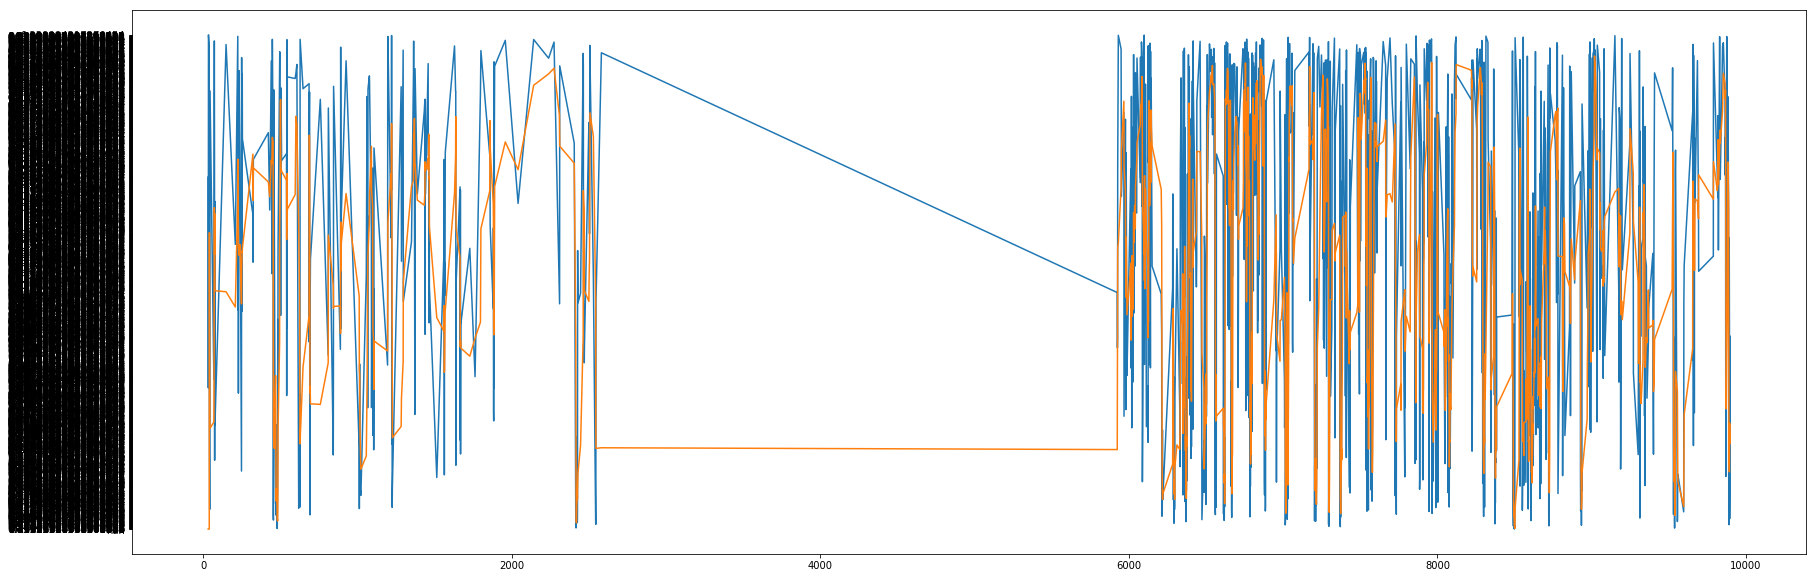

In [34]:
from matplotlib import pyplot as plt

thres_df_drowsiness['eye_ar_mean'] = thres_df_drowsiness['drowsiness.eye_ar'].rolling(window=5).mean()
thres_df_drowsiness['eye_ar_mean'].head()
#df_thres[['drowsiness.eye_ar','eye_ar_mean']].plot(subplots=True,figsize=(9,5),grid=True)

plt.figure(figsize=(30,10))
plt.plot(thres_df_drowsiness[['drowsiness.eye_ar','eye_ar_mean']])

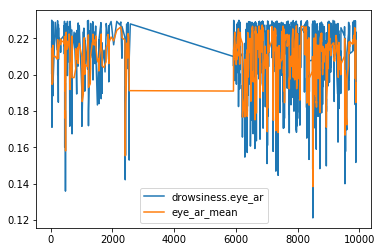

In [35]:
thres_df_drowsiness[['drowsiness.eye_ar','eye_ar_mean']].astype(float).plot()
plt.show()

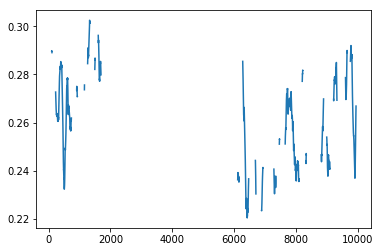

In [36]:
plt.plot(log_df['drowsiness.eye_ar'].rolling(window=100).mean())

In [37]:
thres_df_drowsiness['drowsiness.eye_ar'].describe(include = 'all')

count                    1341
unique                   1125
top       0.22797188002057145
freq                       10
Name: drowsiness.eye_ar, dtype: object

In [38]:
Counter(thres_df_drowsiness['frame_id'])
log_df.shape[0] #6601
total_time = 4*60 + 24
T_per_frame = total_time/log_df.shape[0]
T_per_frame # 0.04

0.04

In [39]:
log_df.shape[0]
frame_per_sec = log_df.shape[0]/total_time
frame_per_sec
log_df.shape[0]/frame_per_sec #264
frame_per_sec #25

25.0

In [40]:
thres_df_drowsiness['frame_id'].head()
log_df['frame_id'].head()
Counter(log_df['frame_id'])

Counter({'1': 1,
         '2': 1,
         '3': 1,
         '4': 1,
         '5': 1,
         '6': 1,
         '7': 1,
         '8': 1,
         '9': 1,
         '10': 1,
         '11': 1,
         '12': 1,
         '13': 1,
         '14': 1,
         '15': 1,
         '16': 1,
         '17': 1,
         '18': 1,
         '19': 1,
         '20': 1,
         '21': 1,
         '22': 1,
         '23': 1,
         '24': 1,
         '25': 1,
         '26': 1,
         '27': 1,
         '28': 1,
         '29': 1,
         '30': 1,
         '31': 1,
         '32': 1,
         '33': 1,
         '34': 1,
         '35': 1,
         '36': 1,
         '37': 1,
         '38': 1,
         '39': 1,
         '40': 1,
         '41': 1,
         '42': 1,
         '43': 1,
         '44': 1,
         '45': 1,
         '46': 1,
         '47': 1,
         '48': 1,
         '49': 1,
         '50': 1,
         '51': 1,
         '52': 1,
         '53': 1,
         '54': 1,
         '55': 1,
         '56': 1,
 

In [41]:
log_df['drowsiness_thres_org'] = EYE_AR_THRESHOLD #0.23
log_df['drowsiness_thres_label'] = avg_eyeAr_manu #0.21
log_df['drowsiness_thres_log'] = avg_eyeAr_log    #0.21

log_df.tail()

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01,drow_label,distr_label,drowsiness_thres_org,drowsiness_thres_label,drowsiness_thres_log
9931,6596,0.33815449526896213,-49.63515370921805,65.38382550479004,83.96973755194362,20.662483634601195,0,0,0.5,0.0016939640045166016,0.010312080383300781,0,0,0.23,0.210042,0.207745
9932,6597,0.3035494723779083,-49.63617756958044,65.80012615526486,83.342294114364,20.28043924702787,0,0,0.5,0.0018310546875,0.009737014770507812,0,0,0.23,0.210042,0.207745
9933,6598,0.3308903277585695,-49.860750157085825,66.32083527281493,84.11571793134966,20.43063651788839,0,0,0.5,0.0018477439880371094,0.011469125747680664,0,0,0.23,0.210042,0.207745
9934,6599,0.31977588082753783,-50.007323037288664,66.94000879513538,83.59929616559602,19.987138122420454,0,0,NaN,0.0018429756164550781,0.010005950927734375,0,0,0.23,0.210042,0.207745
9935,6600,0.3199304971474787,-50.221065981240415,67.20529755046988,83.71801638586817,19.876551513276723,0,0,NaN,0.0021228790283203125,0.00995492935180664,0,0,0.23,0.210042,0.207745


# 4 Distraction evaluation

In [42]:
log_df_distraction = log_df[~pd.isnull(log_df['distraction.x_theta'])]
log_df_distraction.shape

(5964, 16)

In [43]:
#Counter(pd.isnull(log_df_notnull_distraction['distraction.x_theta']))
log_df_distraction['distraction.x_theta'].tail()


9931    20.662483634601195
9932     20.28043924702787
9933     20.43063651788839
9934    19.987138122420454
9935    19.876551513276723
Name: distraction.x_theta, dtype: object

In [44]:
"""
#log_df['frame_id0'] = int(log_df['frame_id'])
def str_to_int(x):
    try:
        return int(x)
    except:
        return np.nan
#log_df['frame_id_int'] = log_df['frame_id'].apply(lambda x: int(x))

log_df['distraction.x_theta_'] = log_df['distraction.x_theta'].apply(str_to_int)
log_df['distraction.x_theta_'].head()
"""

"\n#log_df['frame_id0'] = int(log_df['frame_id'])\ndef str_to_int(x):\n    try:\n        return int(x)\n    except:\n        return np.nan\n#log_df['frame_id_int'] = log_df['frame_id'].apply(lambda x: int(x))\n\nlog_df['distraction.x_theta_'] = log_df['distraction.x_theta'].apply(str_to_int)\nlog_df['distraction.x_theta_'].head()\n"

In [45]:
df_thres_distraction = log_df[log_df['distraction.x_theta'].astype(float) > ANGLE_THRESHOLD]
df_thres_distraction.head()

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01,drow_label,distr_label,drowsiness_thres_org,drowsiness_thres_label,drowsiness_thres_log
9,8,0.33642119049638886,-51.12922561575191,67.36667534365974,86.48443197263796,20.73226256495198,0,0,0.5,0.001992940902709961,0.015405893325805664,0,0,0.23,0.210042,0.207745
10,9,0.3272690181518695,-49.96742112773096,66.33872088408359,86.26783627955479,21.44989151685149,0,0,0.5,0.0019943714141845703,0.011253118515014648,0,0,0.23,0.210042,0.207745
11,10,0.3264002356577961,-50.42331477681392,66.47383870897426,86.32892842749551,21.174845010046894,0,0,0.5,0.0022869110107421875,0.009793758392333984,0,0,0.23,0.210042,0.207745
12,11,0.3089288031785175,-50.47537496293523,66.45069147301142,86.10641834652321,21.029518552596056,0,0,0.5,0.002032041549682617,0.010801076889038086,0,0,0.23,0.210042,0.207745
13,12,0.34894582855270984,-50.778273013477374,65.4225037349076,86.06251788142583,20.942090546563012,0,0,0.5,0.001981973648071289,0.01524806022644043,0,0,0.23,0.210042,0.207745


In [46]:
df_thres_distraction['distraction.x_theta'].describe(include='all')

count                   3235
unique                  3234
top       22.870502963758124
freq                       2
Name: distraction.x_theta, dtype: object

# 4.1 Average threshold of distraction in log analysis

In [47]:
avg_distraction_log = np.mean(df_thres_distraction['distraction.x_theta'].astype(float))
avg_distraction_log #23.692899930970494

23.692899930970494

In [48]:
Counter(df_thres_distraction['distraction.x_theta'])
df_thres_distraction['distraction.x_theta'].describe()

count                   3235
unique                  3234
top       22.870502963758124
freq                       2
Name: distraction.x_theta, dtype: object

In [49]:
#store in same log csv file
##drowsiness threshold:
#log_df['drowsiness_thres_org'] = EYE_AR_THRESHOLD #0.23
#log_df['drowsiness_thres_label'] = avg_eyeAr_manu #0.21
#log_df['drowsiness_thres_log'] = avg_eyeAr_log    #0.21

##distraction threshold:
log_df['distraction_thres_org'] = ANGLE_THRESHOLD         #0.21
log_df['distraction_thres_label'] = avg_distraction_manu  #25
log_df['distraction_thres_log'] = avg_distraction_log     #0.24

In [50]:
df_thres_distraction['distraction.x_theta'].describe(include='all')

count                   3235
unique                  3234
top       22.870502963758124
freq                       2
Name: distraction.x_theta, dtype: object

from matplotlib import pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(df_thres['drowsiness.eye_ar'])
plt.plot(df_thres['drowsiness.eye_ar'].rolling(window=20).mean())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


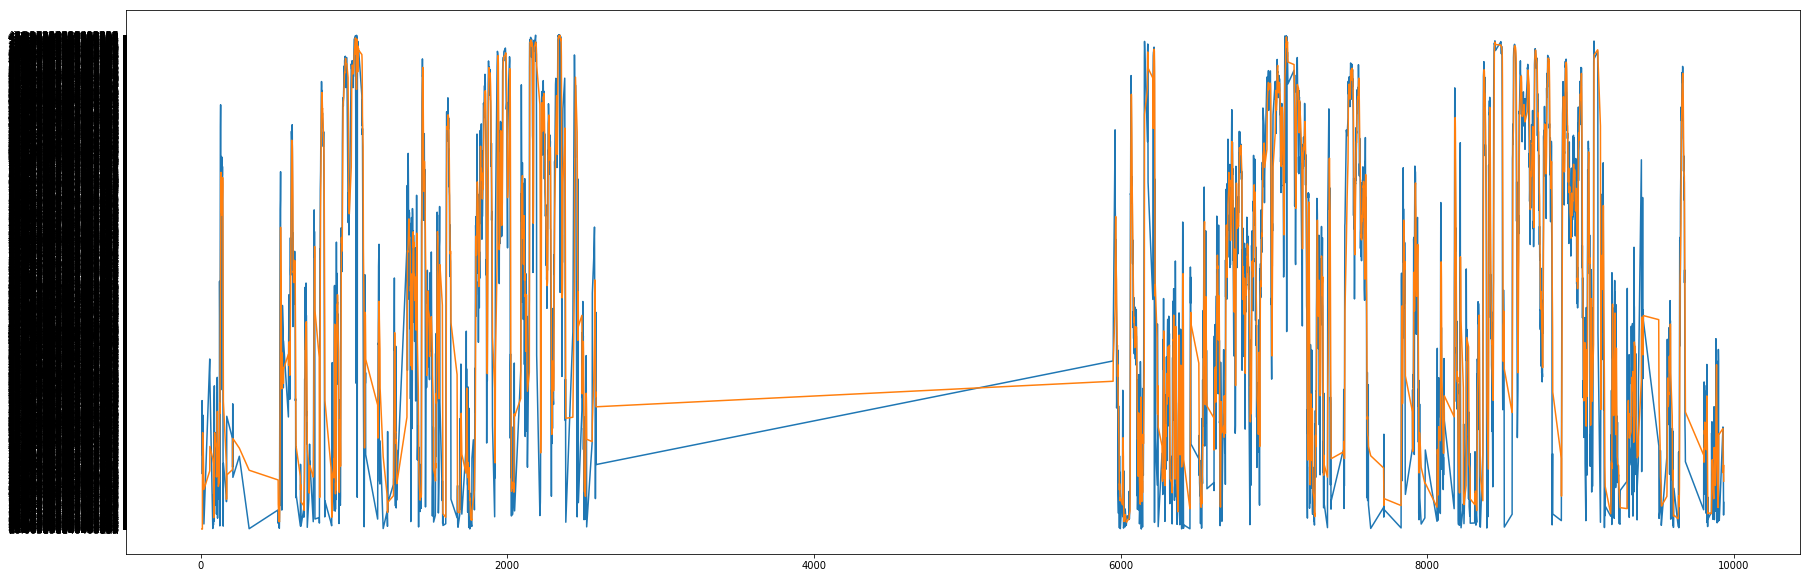

In [51]:
from matplotlib import pyplot as plt

df_thres_distraction['x_theta_mean'] = df_thres_distraction['distraction.x_theta'].rolling(window=5).mean()
df_thres_distraction['x_theta_mean'].head()
#df_thres[['drowsiness.eye_ar','eye_ar_mean']].plot(subplots=True,figsize=(9,5),grid=True)

plt.figure(figsize=(30,10))
plt.plot(df_thres_distraction[['distraction.x_theta','x_theta_mean']])

In [52]:
df_thres_distraction.columns

Index(['frame_id', 'drowsiness.eye_ar', 'distraction.x_rotation',
       'distraction.y_rotation', 'distraction.z_rotation',
       'distraction.x_theta', 'drowsiness.series', 'distraction.series',
       'states.display.state', 'profiling.predict', 'profiling.detect01',
       'drow_label', 'distr_label', 'drowsiness_thres_org',
       'drowsiness_thres_label', 'drowsiness_thres_log', 'x_theta_mean'],
      dtype='object')

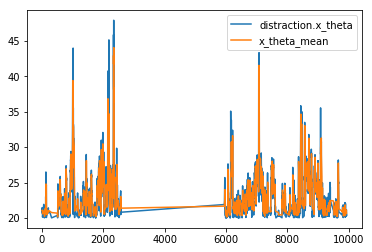

In [53]:
df_thres_distraction[['distraction.x_theta','x_theta_mean']].astype(float).plot()
plt.show()

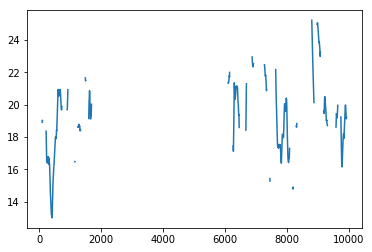

In [54]:
plt.plot(log_df['distraction.x_theta'].rolling(window=100).mean())
plt.show()

In [55]:
df_thres_distraction['distraction.x_theta'].describe(include = 'all')

count                   3235
unique                  3234
top       22.870502963758124
freq                       2
Name: distraction.x_theta, dtype: object

# 5. Summary

In [56]:


# pre-setting threshold: 
EYE_AR_THRESHOLD = '0.23'
ANGLE_THRESHOLD = 20

# Manual label analysis: 
avg_eyeAr_manu
# Average threshold of drowsiness in Manual mode:  0.2594156359975244
avg_distraction_manu
# Average threshold of distraction in Manual mode:  17.2492584199810321

#Log analysis:
avg_eyeAr_log # threshold: 0.1819817988584722
avg_distraction_log # threshold: 25.97936456624409

#store in same log csv file
##drowsiness threshold:
#log_df['drowsiness_thres_org'] = EYE_AR_THRESHOLD #0.23
#log_df['drowsiness_thres_label'] = avg_eyeAr_manu #0.21
#log_df['drowsiness_thres_log'] = avg_eyeAr_log    #0.21

##distraction threshold:
log_df['distraction_thres_org'] = ANGLE_THRESHOLD         #0.21
log_df['distraction_thres_label'] = avg_distraction_manu  #25
log_df['distraction_thres_log'] = avg_distraction_log     #0.24

# 6. Save to csv file

In [57]:
log_df.columns
log_df.rename(columns={'drow_label':'drowsiness_label','distr_label':'distraction_label',},inplace=True)
log_df['EYE_AR_THRESHOLD'] = EYE_AR_THRESHOLD
log_df['ANGLE_THRESHOLD'] = ANGLE_THRESHOLD
log_df['avg_eyeAr_manual'] = avg_eyeAr_manu
log_df['avg_distraction_manual'] = avg_distraction_manu
log_df['avg_eyeAr_log'] = avg_eyeAr_log
log_df['avg_distraction_log'] = avg_distraction_log

In [58]:
csv_file = out_path + 'thres_' +  str(EYE_AR_THRESHOLD) + '_' + str(ANGLE_THRESHOLD) + '_' + file_name + '.csv'
csv_file

'/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/thres_0.23_20_drosiness_dark_shift_light.csv'

In [59]:
log_df.to_csv(csv_file,index=None)

In [60]:
log_df.head(5)

,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,...,drowsiness_thres_log,distraction_thres_org,distraction_thres_label,distraction_thres_log,EYE_AR_THRESHOLD,ANGLE_THRESHOLD,avg_eyeAr_manual,avg_distraction_manual,avg_eyeAr_log,avg_distraction_log
2,1,0.33448588193827844,-53.11394879341673,65.58516242829776,84.4539711218493,18.60846125163536,0,0,NaN,0.0020110607147216797,...,0.207745,20,25.162047,23.6929,0.23,20,0.210042,25.162047,0.207745,23.6929
3,2,0.3277673338146963,-53.31739111239548,65.57328045137852,84.18126982301597,18.34299489963224,0,0,NaN,0.0020079612731933594,...,0.207745,20,25.162047,23.6929,0.23,20,0.210042,25.162047,0.207745,23.6929
4,3,0.31410192511979956,-52.55827278721198,65.66374559999556,85.39643356257756,19.428268028219122,0,0,NaN,0.0023310184478759766,...,0.207745,20,25.162047,23.6929,0.23,20,0.210042,25.162047,0.207745,23.6929
5,4,0.3097009943593406,-53.12312325328732,67.3342382632249,84.5273583729647,18.4423233658144,0,0,NaN,0.0022351741790771484,...,0.207745,20,25.162047,23.6929,0.23,20,0.210042,25.162047,0.207745,23.6929
6,5,0.31977044538247923,-52.607012222633045,67.30392636759898,85.59662996707742,19.336744492185403,0,0,NaN,0.0020558834075927734,...,0.207745,20,25.162047,23.6929,0.23,20,0.210042,25.162047,0.207745,23.6929


# 7. Log analysis

  3 video files:
 - [dronsiness_13]:   more drowsiness scenarios
 - [drowsiness_dark_shift_bright]:   more distraction scenarioes, dark and bright shift 
 - [video11]:  well balance between drowsiness and distraction. 

# Handling updated log and data processing--video11

In [61]:
import pandas as pd
import numpy as np
from collections import Counter
EYE_AR_THRESHOLD = '0.23'
ANGLE_THRESHOLD = 20

file_name = 'video11'
in_path = '/Users/fenghuiyou/Desktop/Prj/tunning/out/logs/'
file_path = in_path + 'dt_experiment_' + file_name + '.csv'

manual_file = '/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/video11/video11_label.csv'

out_path = '/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/'

In [62]:
log_df_manual = pd.read_csv(manual_file)

log_df_manual.rename(columns={'label_sleepy':'drowsiness_label','label_head':'distraction_label'},inplace=True)
log_df_manual.shape
Counter(log_df_manual['drowsiness_label'])  # {0: 5985, 1: 447}
Counter(log_df_manual['distraction_label']) #{0: 5983, 1: 449}
log_df_manual.shape

(6432, 14)

In [63]:
log_df_drow_warn = pd.read_csv('/Users/fenghuiyou/Desktop/Prj/tunning/out/logs/dt_experiment_video11.csv')
log_df_drow_warn.head()


,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
0,1,0.13181722602918303,-48.962412284088444,63.48588856479233,93.93391023298244,9.76600790425122,1,0,0.5,0.002508878707885742,0.021054983139038086
1,2,0.1444506788571002,-48.75141470783313,61.921615423875224,93.40433370391399,9.635972459579243,1,0,0.5,0.0018379688262939453,0.017729759216308594
2,3,0.17463781132068956,-48.50447597984472,62.355400426622374,92.40905711077181,9.235054323705677,1,0,0.5,0.002493143081665039,0.01665496826171875
3,4,0.2298121886058505,-48.42713242992154,62.37388803890565,90.94197506723205,8.55826873409411,1,0,0.5,0.001870870590209961,0.01636505126953125
4,5,0.22885948998248362,-47.5796169491708,63.251840695053744,90.04787781926848,8.540108998538487,1,0,0.5,0.0019817352294921875,0.009934186935424805


In [64]:
Counter(log_df_drow_warn['frame_id'])
log_df_drow_warn = log_df_drow_warn.drop_duplicates(subset=['frame_id'])
Counter(log_df_drow_warn['frame_id'])
log_df_drow_warn['drowsiness.series'].head()
#log_df_manual['drowsiness_label'].head()

0    1
1    1
2    1
3    1
4    1
Name: drowsiness.series, dtype: object

label for video 11:
	1.	0:00 - 0:08: look around
	2.	0:10 - 0:14: look around
	3.	0:26 - 0:32: sleepy
	4.	0:42 - 0:43: hand
	5.	0:53 - 0:56: look around
	6.	2:10 - 2:16: hand
	7.	2:30 - 2:35: hand
	8.	2:36 - 2:38: hand
	9.	2:50 - 2:52: hand
	10.	2:55 - 2:57: hand
	11.	2:49 - 2:55: sleepy
	12.	2:59 - 3:02: sleepy
	•	Sleepy label: 0:26 - 0:32 & 2:49 - 2:55 & 2:59 - 3:02, which corresponds to frame 782 - 961 & 5080 - 5259 & 5381 - 5470 respectively.
	•	Look around label: 0:00 - 0:08 & 0:10 - 0:14 & 0:53 - 0:56, which corresponds to frame 0 - 240 & 301 - 420 & 1593 - 1683 respectively.

In [65]:
log_df_manual['drowsiness_label'].shape
log_df_drow_warn['drowsiness.series'].shape

Counter(log_df_manual['drowsiness_label']) #{0: 5985, 1: 447}
Counter(log_df_drow_warn['drowsiness.series']) #{'0': 4398, '1': 1520, 'drowsiness.series': 1, nan: 514}
log_df_drow_warn['drowsiness.series'] = log_df_drow_warn['drowsiness.series'].apply(lambda x: '0' if x is np.nan else x)

In [66]:
#log_df_manual['drowsiness_label'].loc[325:425] = 1
#log_df_manual['drowsiness_label'].loc[1725:1750] = 1

log_df_drow_warn['drowsiness_label'] = log_df_manual['drowsiness_label']
Counter(log_df_drow_warn['drowsiness_label'])  #{False: 5986, True: 447}


log_df_drow_warn['distraction_label'] = log_df_manual['distraction_label']
Counter(log_df_drow_warn['distraction_label'])  #{False: 5984, True: 449}

Counter({1.0: 449,
         0.0: 4027,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         

In [67]:
log_df_drow_warn = log_df_drow_warn[~pd.isnull(log_df_drow_warn['drowsiness.series'])]
Counter(log_df_drow_warn['drowsiness.series'])

Counter({'0': 4912, '1': 1520, 'drowsiness.series': 1})

In [68]:
log_df_manual['distraction_label'].shape

(6432,)

In [69]:
Counter(log_df_drow_warn['drowsiness.series'])


Counter({'0': 4912, '1': 1520, 'drowsiness.series': 1})

In [70]:
FP_cnt = log_df_temp[log_df_temp['drowsiness_label']==1].shape[0] - log_df_temp[(log_df_temp['drowsiness.series']==1)].shape[0]
FP_cnt

NameError: name 'log_df_temp' is not defined

In [ ]:
diff_common_drow = log_df_temp[(log_df_temp['drowsiness.series']==1) & (log_df_temp['drowsiness_label']==1)]
diff_common_drow.shape[0]

In [ ]:
TPR = diff_common_drow.shape[0]/true_cnt.shape[0]
TPR

In [ ]:
Counter(pd.isnull(log_df_drow_warn['drowsiness.eye_ar']))
Counter(log_df_drow_warn['drowsiness_label']) #Counter({0: 5589, 1: 375})
temp_df = log_df_drow_warn[(log_df_drow_warn['drowsiness_label']==1) & (log_df_drow_warn['drowsiness.eye_ar'] > 0.23)]
temp_df['drowsiness_label']=0
temp_df['drowsiness_label'].head()

In [ ]:
#log_df_drow_warn_ = pd.merge(temp_df,log_df_drow_warn,how='left',on=['frame_id'])
#log_df_drow_warn_.shape
left_join = pd.concat([temp_df,log_df_drow_warn],axis=1,join='inner')
left_join.shape

# Draw Confusion Matrix

In [71]:
Counter(log_df_drow_warn['drowsiness.series']) #{'0': 4912, '1': 1520, 'drowsiness.series': 1}
Counter(log_df_manual['drowsiness_label'])
log_df_manual['drowsiness_label'].shape

i = log_df_drow_warn[log_df_drow_warn['drowsiness.series']=='drowsiness.series'].index
#log_df_drow_warn.drop(i)
i
log_df_drow_warn['drowsiness.series'][1956] = '0'
#log_df_drow_warn.drop(1956)
Counter(log_df_manual['drowsiness_label']) #{0: 5985, 1: 447}
Counter(log_df_drow_warn['drowsiness.series'])  #{'0': 4913, '1': 1520}
log_df_drow_warn['drowsiness.series'].shape #6433
log_df_manual['drowsiness_label'].shape #6432
log_df_drow_warn['drowsiness.series'].shape
#log_df_drow_warn['drowsiness.series'] = log_df_drow_warn['drowsiness.series'].ix[1:]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(6433,)

In [72]:
temp_serial = log_df_drow_warn['drowsiness.series'].ix[1:]
#log_df_drow_warn['drowsiness.series'].shape
temp_serial.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(6432,)

In [73]:
from sklearn.metrics import confusion_matrix
import pylab as pl
y_true_drow = log_df_manual['drowsiness_label']
#y_pred_drow = log_df_drow_warn['drowsiness.series']
y_pred_drow = temp_serial

Counter(y_true_drow) #{0: 5985, 1: 447}
Counter(y_pred_drow) #{'0': 4913, '1': 1517, nan: 2}
y_pred_drow = y_pred_drow.apply(lambda x: '0' if x is np.nan else x)


In [74]:
def str_to_int(x):
    try:
        return int(x)
    except:
        return 0

y_pred_drow = y_pred_drow.apply(str_to_int)
Counter(y_pred_drow)

Counter({0: 4913, 1: 1519})

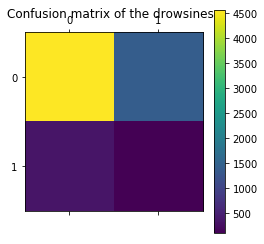

In [75]:
#cm = confusion_matrix(y_true,y_pred)
cm_drow = confusion_matrix(y_true_drow,y_pred_drow)

pl.matshow(cm_drow)
pl.title('Confusion matrix of the drowsiness')
pl.colorbar()
pl.show()

In [76]:
y_true_dist = log_df_manual['distraction_label']
#y_pred_dist_ = log_df_drow_warn['distraction.series']
Counter(y_true_dist) # Counter({'0': 5755, '1': 163, 'distraction.series': 1, nan: 514})

y_pred_dist_ = log_df_drow_warn['distraction.series'].apply(lambda x: 0 if x is np.nan else x)
Counter(y_pred_dist_) #Counter({'0': 5755, 0: 514, '1': 163, 'distraction.series': 1})


Counter({'0': 5755, 0: 514, '1': 163, 'distraction.series': 1})

In [77]:
idx = y_pred_dist_[y_pred_dist_=='distraction.series'].index
idx  #Int64Index([1956], dtype='int64')


Int64Index([1956], dtype='int64')

In [78]:
y_pred_dist_[1956] = 0
y_pred_dist = y_pred_dist_.ix[1:]
Counter(y_pred_dist)  #Counter({'0': 5754, 0: 515, '1': 163})

y_pred_dist = y_pred_dist.apply(str_to_int)
Counter(y_pred_dist)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Counter({0: 6269, 1: 163})

In [79]:
Counter(y_true_dist) #Counter({0: 5983, 1: 449})
Counter(y_pred_dist) #Counter({0: 5721, 1: 242})

Counter({0: 6269, 1: 163})

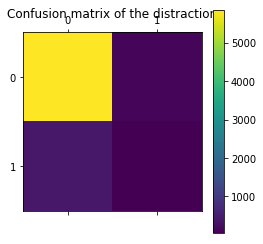

In [80]:
cm_dist = confusion_matrix(y_true_dist,y_pred_dist)

pl.matshow(cm_dist)

pl.title('Confusion matrix of the distraction')
pl.colorbar()
pl.show()

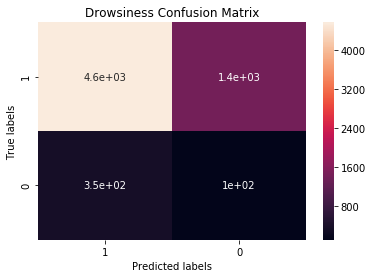

In [81]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm_drow, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Drowsiness Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

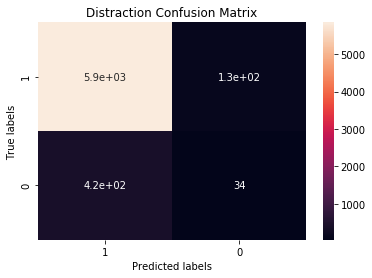

In [82]:
ax= plt.subplot()
sns.heatmap(cm_dist, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Distraction Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

In [83]:
#df_lebel_video11 = np.concat(y_true_drow + y_pred_drow + y_true_dist + y_pred_dist)
Counter(y_true_drow)     #{0: 5985, 1: 447}
#Counter(y_pred_drow)    #{0: 4915, 1: 1517}
#Counter(y_true_dist)    #{0: 5983, 1: 449}
#Counter(y_pred_dist)    #{0: 6269, 1: 163})


Counter({0: 5985, 1: 447})

In [85]:
y_true_drow_video11 = y_true_drow
y_pred_drow_video11 = y_pred_drow
y_true_dist_video11 = y_true_dist
y_pred_dist_video11 = y_pred_dist

# 8. Handling updated log and data processing--dronsiness_13


In [86]:
import pandas as pd
import numpy as np
from collections import Counter
EYE_AR_THRESHOLD = '0.23'
ANGLE_THRESHOLD = 20

file_name = 'dronsiness_13'
in_path = '/Users/fenghuiyou/Desktop/Prj/tunning/out/logs/'
file_path = in_path + 'dt_experiment_' + file_name + '.csv'

#manual_file = '/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/video11/video11_label.csv'

out_path = '/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/'

log_df_drow_13 = pd.read_csv(file_path)
log_df_drow_13.head()


,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
0,1,0.131817,-48.962412,63.485889,93.933910,9.766008,1.0,0.0,0.5,0.002509,0.021055
1,2,0.144451,-48.751415,61.921615,93.404334,9.635972,1.0,0.0,0.5,0.001838,0.017730
2,3,0.174638,-48.504476,62.355400,92.409057,9.235054,1.0,0.0,0.5,0.002493,0.016655
3,4,0.229812,-48.427132,62.373888,90.941975,8.558269,1.0,0.0,0.5,0.001871,0.016365
4,5,0.228859,-47.579617,63.251841,90.047878,8.540109,1.0,0.0,0.5,0.001982,0.009934


In [87]:
Counter(log_df_drow_13['frame_id'])
log_df_drow_13.shape  #(1956, 11)

(1956, 11)

## Setting manual label

Drowsiness:
 - Frame 75~230    :[Drowsiness]
 - Frame 280~350   :[Drowsiness]
 - Frame 719~768   :[Drowsiness] 
 - Frame 818~980   :[Drowsiness] 
 - Frame 1100~1199 :[Drowsiness] 
 - Frame 1345~1695 :[Drowsiness]  
 
Distraction:
 - Frame 643~666: hand move/mouth covered; 
 - Frame 1825~1875: headd move

In [88]:
#set drowsiness label:
log_df_drow_13['drowsiness_label'] = 0
log_df_drow_13['drowsiness_label'].loc[75:230] = 1
log_df_drow_13['drowsiness_label'].loc[280:350] = 1
log_df_drow_13['drowsiness_label'].loc[719:768] = 1
log_df_drow_13['drowsiness_label'].loc[818:980] = 1
log_df_drow_13['drowsiness_label'].loc[1100:1199] = 1
log_df_drow_13['drowsiness_label'].loc[1345:1695] = 1

#set distaction label:
log_df_drow_13['distraction_lable'] = 0
#df_thres['distraction_lable'].loc[np.r_[643:666,1825:1875]] = 1
log_df_drow_13['distraction_lable'].loc[643:666] = 1
log_df_drow_13['distraction_lable'].loc[1825:1875] = 1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
Counter(log_df_drow_13['drowsiness_label']) #Counter({0: 1065, 1: 891})
Counter(log_df_drow_13['distraction_lable']) #Counter({0: 1881, 1: 75})

Counter({0: 1881, 1: 75})

In [91]:
Counter(log_df_drow_13['drowsiness.series'])
Counter(log_df_drow_13['distraction.series'])

Counter({0.0: 1449,
         1.0: 159,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         

In [92]:
temp_ds_ = log_df_drow_13['drowsiness.series'].apply(lambda x: 0 if x is np.nan else x)
log_df_drow_13['distraction.series_nan'] = log_df_drow_13['distraction.series'].apply(lambda x: 0 if x is np.nan else x)
Counter(pd.isnull(log_df_drow_13['drowsiness.series']))  #Counter({False: 1608, True: 348})
Counter(pd.isnull(log_df_drow_13['distraction.series'])) #Counter({False: 1608, True: 348})

Counter({False: 1608, True: 348})

In [93]:
log_df_drow_13 = log_df_drow_13[~pd.isnull(log_df_drow_13['drowsiness.series'])]
log_df_drow_13.shape    #(1608, 14)


(1608, 14)

In [94]:
Counter(log_df_drow_13['drowsiness.series'])  #Counter({0.0: 801, 1.0: 807})
Counter(log_df_drow_13['distraction.series']) #Counter({0.0: 1449, 1.0: 159})
Counter(log_df_drow_13['drowsiness_label'])   #Counter({0: 810, 1: 798})
Counter(log_df_drow_13['distraction_lable'])  #Counter({0: 1577, 1: 31})

Counter({0: 1577, 1: 31})

# Draw Confusion Matrix

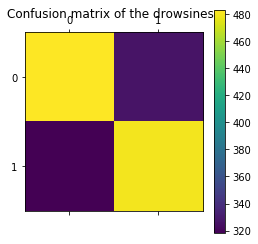

In [95]:
from sklearn.metrics import confusion_matrix
import pylab as pl
y_true_drow = log_df_drow_13['drowsiness_label']
y_pred_drow = log_df_drow_13['drowsiness.series']

#cm = confusion_matrix(y_true,y_pred)
cm_drow = confusion_matrix(y_true_drow,y_pred_drow)

pl.matshow(cm_drow)
pl.title('Confusion matrix of the drowsiness')
pl.colorbar()
pl.show()

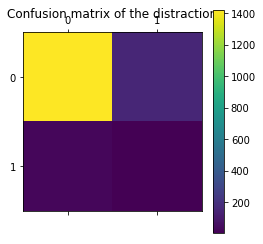

In [96]:
y_true_dist = log_df_drow_13['distraction_lable']
y_pred_dist = log_df_drow_13['distraction.series']

cm_dist = confusion_matrix(y_true_dist,y_pred_dist)

pl.matshow(cm_dist)
pl.title('Confusion matrix of the distraction')
pl.colorbar()
pl.show()


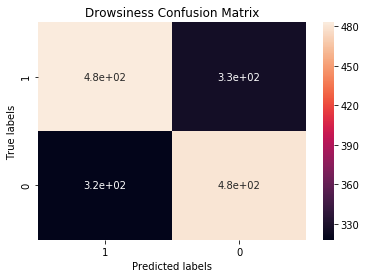

In [97]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm_drow, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Drowsiness Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);



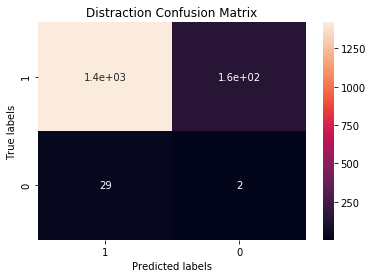

In [98]:
ax= plt.subplot()
sns.heatmap(cm_dist, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Distraction Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

In [99]:
y_true_drow_drow_13 = y_true_drow
y_pred_drow_drow_13 = y_pred_drow
y_true_dist_drow_13 = y_true_dist
y_pred_dist_drow_13 = y_pred_dist
Counter(y_pred_dist_drow_13)  #Counter({0.0: 1449, 1.0: 159})

Counter({0.0: 1449, 1.0: 159})

# 9. Handling updated log and data processing--drosiness_dark_shift_light


In [100]:
import pandas as pd
import numpy as np
from collections import Counter
EYE_AR_THRESHOLD = '0.23'
ANGLE_THRESHOLD = 20

file_name = 'drowsiness_dark_shit_light'
in_path = '/Users/fenghuiyou/Desktop/Prj/tunning/out/logs/'
file_path = in_path + 'dt_experiment_' + file_name + '.csv'

#manual_file = '/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/video11/video11_label.csv'
#dt_experiment_drowsiness_dark_shit_light.csv

out_path = '/Users/fenghuiyou/Desktop/Prj/tunning/analysis/evaluation/'

log_df_drow_dark = pd.read_csv(file_path)
log_df_drow_dark.head()


,frame_id,drowsiness.eye_ar,distraction.x_rotation,distraction.y_rotation,distraction.z_rotation,distraction.x_theta,drowsiness.series,distraction.series,states.display.state,profiling.predict,profiling.detect01
0,1,0.334486,-53.113949,65.585162,84.453971,1.843243,0.0,0.0,NaN,0.002252,0.017282
1,2,0.327767,-53.317391,65.573280,84.181270,1.581259,0.0,0.0,NaN,0.002123,0.016589
2,3,0.314102,-52.558273,65.663746,85.396434,2.691419,0.0,0.0,NaN,0.001757,0.010998
3,4,0.309701,-53.123123,67.334238,84.527358,2.158658,0.0,0.0,NaN,0.002574,0.017279
4,5,0.319770,-52.607012,67.303926,85.596630,3.087149,0.0,0.0,NaN,0.002004,0.016435


In [101]:
Counter(log_df_drow_dark['frame_id'])
log_df_drow_dark.shape  #(6600, 11)

(6600, 11)

## Manual lebel setting 

In [102]:
#drowsiness label frame:
log_df_drow_dark['drowsiness_label'] = 0
log_df_drow_dark['drowsiness_label'].loc[4675:4925] = 1 
log_df_drow_dark['drowsiness_label'].loc[325:425] = 1
log_df_drow_dark['drowsiness_label'].loc[1725:1750] = 1

#distraction label frame:
log_df_drow_dark['distraction_lable'] = 0
log_df_drow_dark['distraction_lable'].loc[325:425] = 1
log_df_drow_dark['distraction_lable'].loc[1025:1050] = 1
log_df_drow_dark['distraction_lable'].loc[1725:1750] = 1
log_df_drow_dark['distraction_lable'].loc[2150:2175] = 1
log_df_drow_dark['distraction_lable'].loc[2400:2550] = 1
log_df_drow_dark['distraction_lable'].loc[3250:3275] = 1 
log_df_drow_dark['distraction_lable'].loc[5075:5100] = 1
log_df_drow_dark['distraction_lable'].loc[5125:5175] = 1
log_df_drow_dark['distraction_lable'].loc[5750:5775] = 1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [103]:
log_df_drow_dark.columns

Counter(log_df_drow_dark['distraction_lable'])
Counter(log_df_drow_dark['drowsiness_label'])

Counter(log_df_drow_dark['drowsiness.series'])
Counter(log_df_drow_dark['distraction.series'])

Counter({0.0: 5722,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         1.0: 242,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         

In [105]:
log_df_drow_dark = log_df_drow_dark[~pd.isnull(log_df_drow_dark['drowsiness.series'])]

Counter(log_df_drow_dark['drowsiness.series'])
Counter(log_df_drow_dark['distraction.series'])
log_df_drow_dark.shape

(5964, 13)

## Draw Confusion Matrix

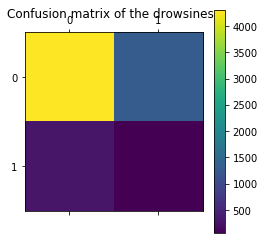

In [106]:
from sklearn.metrics import confusion_matrix
import pylab as pl
y_true_drow = log_df_drow_dark['drowsiness_label']
y_pred_drow = log_df_drow_dark['drowsiness.series']

#cm = confusion_matrix(y_true,y_pred)
cm_drow = confusion_matrix(y_true_drow,y_pred_drow)

pl.matshow(cm_drow)
pl.title('Confusion matrix of the drowsiness')
pl.colorbar()
pl.show()

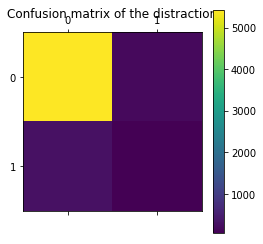

In [107]:
y_true_dist = log_df_drow_dark['distraction_lable']
y_pred_dist = log_df_drow_dark['distraction.series']

cm_dist = confusion_matrix(y_true_dist,y_pred_dist)

pl.matshow(cm_dist)
pl.title('Confusion matrix of the distraction')
pl.colorbar()
pl.show()


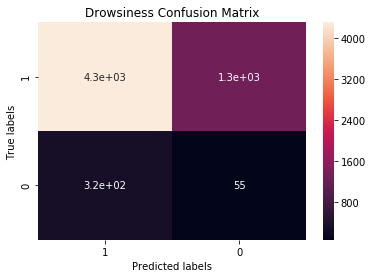

In [108]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm_drow, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Drowsiness Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


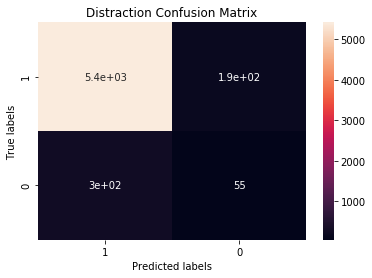

In [109]:
ax= plt.subplot()
sns.heatmap(cm_dist, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Distraction Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

In [110]:
y_true_drow_drow_dark = y_true_drow
y_pred_drow_drow_dark = y_pred_drow
y_true_dist_drow_dark = y_true_dist
y_pred_dist_drow_dark = y_pred_dist
Counter(y_pred_dist_drow_dark)  #Counter({0.0: 5722, 1.0: 242})

Counter({0.0: 5722, 1.0: 242})

# 10.  Confusion Matrix Summary based on 3 labelled videos

In [111]:
y_true_drow_sum = y_true_drow_drow_dark.append(y_true_drow_drow_13).append(y_true_drow_video11)
y_pred_drow_sum = y_pred_drow_drow_dark.append(y_pred_drow_drow_13).append(y_pred_drow_video11)

y_true_dist_sum = y_true_dist_drow_dark.append(y_true_dist_drow_13).append(y_true_dist_video11)
y_pred_dist_sum = y_pred_dist_drow_dark.append(y_pred_dist_drow_13).append(y_pred_dist_video11)


"""
y_true_drow_drow_dark = y_true_drow
y_pred_drow_drow_dark = y_pred_drow
y_true_dist_drow_dark = y_true_dist
y_pred_dist_drow_dark = y_pred_dist
#--
y_true_drow_drow_13 = y_true_drow
y_pred_drow_drow_13 = y_pred_drow
y_true_dist_drow_13 = y_true_dist
y_pred_dist_drow_13 = y_pred_dist
Counter(y_pred_dist_drow_13)  #Counter({0.0: 1449, 1.0: 159})
#--
y_true_drow_video11 = y_true_drow
y_pred_drow_video11 = y_pred_drow
y_true_dist_video11 = y_true_dist
y_pred_dist_video11 = y_pred_dist
"""

'\ny_true_drow_drow_dark = y_true_drow\ny_pred_drow_drow_dark = y_pred_drow\ny_true_dist_drow_dark = y_true_dist\ny_pred_dist_drow_dark = y_pred_dist\n#--\ny_true_drow_drow_13 = y_true_drow\ny_pred_drow_drow_13 = y_pred_drow\ny_true_dist_drow_13 = y_true_dist\ny_pred_dist_drow_13 = y_pred_dist\nCounter(y_pred_dist_drow_13)  #Counter({0.0: 1449, 1.0: 159})\n#--\ny_true_drow_video11 = y_true_drow\ny_pred_drow_video11 = y_pred_drow\ny_true_dist_video11 = y_true_dist\ny_pred_dist_video11 = y_pred_dist\n'

In [112]:
y_true_drow_sum.shape
y_pred_drow_sum.shape
y_true_dist_sum.shape
y_pred_dist_sum.shape

(14004,)

## Draw Confusion Matrix

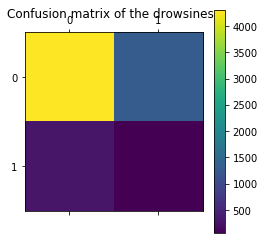

array([[9353, 3031],
       [ 984,  636]])

In [117]:
from sklearn.metrics import confusion_matrix
import pylab as pl
#y_true_drow = log_df_drow_dark['drowsiness_label']
#y_pred_drow = log_df_drow_dark['drowsiness.series']

#cm = confusion_matrix(y_true,y_pred)
cm_drow_sum = confusion_matrix(y_true_drow_sum,y_pred_drow_sum)

pl.matshow(cm_drow)
pl.title('Confusion matrix of the drowsiness')
pl.colorbar()
pl.show()
cm_drow_sum

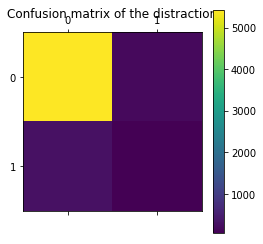

array([[12693,   473],
       [  747,    91]])

In [118]:
y_true_dist = log_df_drow_dark['distraction_lable']
y_pred_dist = log_df_drow_dark['distraction.series']

cm_dist_sum = confusion_matrix(y_true_dist_sum,y_pred_dist_sum)

pl.matshow(cm_dist)
pl.title('Confusion matrix of the distraction')
pl.colorbar()
pl.show()

cm_dist_sum

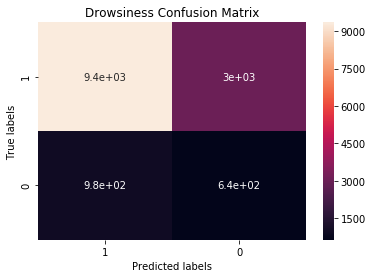

In [115]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm_drow_sum, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Drowsiness Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); 
ax.yaxis.set_ticklabels(['1', '0']);


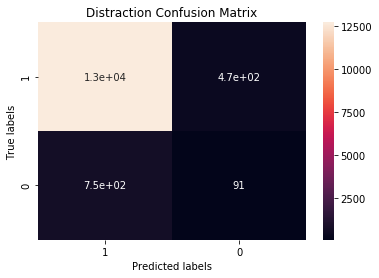

In [116]:
ax= plt.subplot()
sns.heatmap(cm_dist_sum, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Distraction Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


In [120]:
cm_dist_sum
cm_drow_sum

array([[12693,   473],
       [  747,    91]])

# 原因分析:

 - 主観判断；(眠気の定義が未明、主観判断がある)
 - アルグリズム改善（Drowsiness・Blink・Yawn・Nodding・DNN複数の方法を合わせで判断）
 - 評価基準の改善
 - 専用のDataSet
